# Machine Learning
# Daniel Michell Pérez Ruiz

## Proyecto de Machine Learning sobre el dataset del cáncer de mama, para determinar si un tumor es maligno o benigno

In [1]:
#Importamos todas las paqueterías que se utilizarán
from sklearn.datasets import load_breast_cancer   #Dataset de interés
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA               #Método PCA
from sklearn.preprocessing import StandardScaler    #Normalizar los datos 
from sklearn.linear_model import LogisticRegression #Método Regresión Logística
from sklearn.cluster import KMeans                  #Método KMeans


Lo primero que realizaremos será la importación de los datos y observar sus características y que tipos de clases existen en este dataset

In [2]:
cancer = load_breast_cancer()  #Dataset

cancer_features = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) #DataFrame con características del dataset
cancer_targets = pd.DataFrame(cancer['target'], columns = ['Cancer'])             #DataFrame con los elementos de las dos clases 
cancer_features.head()
#cancer_features


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#0 representa que el tumor es maligno y 1 representa que el tumor es benigno
cancer_targets.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [4]:
#Observemos todas las características
cancer.feature_names[0:9]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry'], dtype='<U23')

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

1    357
0    212
Name: Cancer, dtype: int64

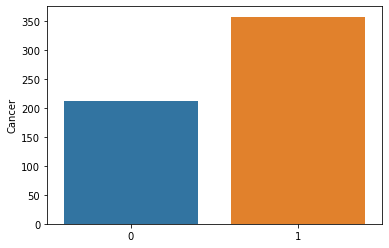

In [6]:
#Gráficamos la distribucción de las clases
decision = cancer_targets['Cancer'].value_counts()
sns.barplot(decision.index[0:],decision[0:])
decision

In [7]:
#Empezamos con la implementación de los métodos

# Método PCA.
         1.- Escalar los datos
         2.- Crear la matriz de covarianza, la cual es simétrica
         3.- Calcular eigenvalores e eigenvectores  
         4.- Almacenar los nuevos datos
         5.- Agregamos a que clase pertenecen
         6.- Visualización de los dos componentes principales

## Scratch

In [8]:
#Escalamos los datos
escala = StandardScaler()
data = escala.fit_transform(cancer_features.values)

In [9]:
#Vamos a crear la matriz 
matriz = np.asmatrix(data)

#Vamos a crear la matriz de coovarianza
matrizCovarianza = np.cov(matriz.T)
#print(matrizCovarianza)    #Es simétrica
matrizCovarianza.shape

(30, 30)

In [10]:
#Ahora calcular nuestros eigenvalores y nuestros eigenvectores
eigValores, eigVectores = np.linalg.eig(matrizCovarianza)
#print(eigValores) #Ya los regresa de mayor a menor
#print(eigVectores)

In [11]:
#Guardamos a los eigenvectores en una nueva variable
primerosDos = eigVectores[:,0:2]
#print(primerosDos)

In [12]:
#Hacemos el producto punto con los datos orignales y los almacenamos en una nueva variable
nuevosDatos = cancer_features.dot(primerosDos)
nuevosDatos

,0,1
0,793.364674,-772.386400
1,831.376304,-819.573038
2,751.111800,-737.924156
3,271.973741,-262.394926
4,741.248858,-730.596479
...,...,...
564,904.399203,-887.916357
565,772.937544,-758.802048
566,522.486870,-512.141833
567,801.865190,-785.872631


In [13]:
#Agregamos la etiqueta correspondiente a la clase
nuevosDatos= pd.DataFrame(np.hstack((nuevosDatos, np.array(cancer_targets).reshape(-1,1))), columns=['PC1','PC2','malign_benign'])

In [14]:
nuevosDatos

,PC1,PC2,malign_benign
0,793.364674,-772.386400,0.0
1,831.376304,-819.573038,0.0
2,751.111800,-737.924156,0.0
3,271.973741,-262.394926,0.0
4,741.248858,-730.596479,0.0
...,...,...,...
564,904.399203,-887.916357,0.0
565,772.937544,-758.802048,0.0
566,522.486870,-512.141833,0.0
567,801.865190,-785.872631,0.0


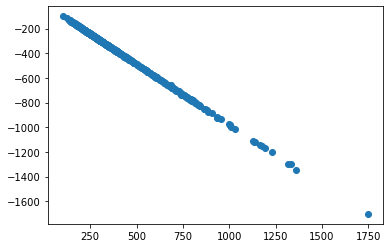

In [15]:
#Graficamos
plt.scatter(nuevosDatos['PC1'],nuevosDatos['PC2'])
plt.show()

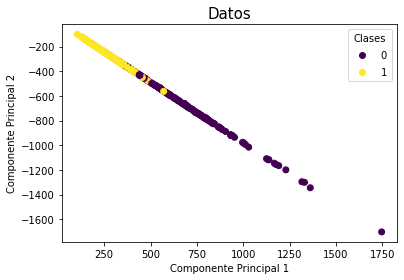

In [16]:
#Imprimimos los componentes principales 
Y = nuevosDatos.malign_benign.values 


fig, ax = plt.subplots()
grafica = ax.scatter(nuevosDatos['PC1'],nuevosDatos['PC2'],c=Y)
leyenda = ax.legend(*grafica.legend_elements(), loc='best',title = 'Clases' )


plt.xlabel('Componente Principal 1'), plt.ylabel('Componente Principal 2')
plt.title('Datos', size=15)

plt.show()

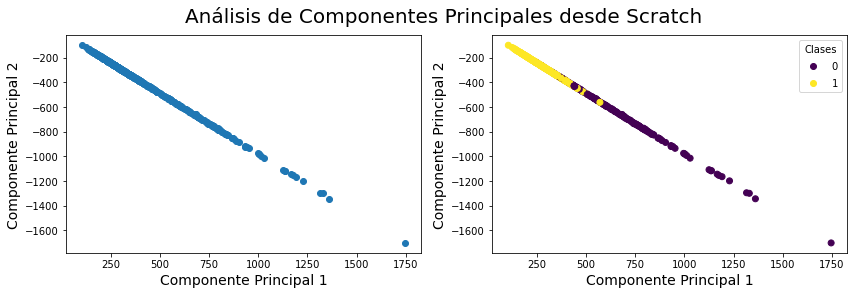

In [17]:
fig, ((grafica1),(grafica2)) =plt.subplots(1,2, figsize=(14,4)) #sharey = Tus graficas comparten los mismos ejes

grafica1.scatter(nuevosDatos['PC1'],nuevosDatos['PC2'])
grafica2.scatter(nuevosDatos['PC1'],nuevosDatos['PC2'],c=Y)


grafica1.set_xlabel('Componente Principal 1',size=14) , grafica1.set_ylabel('Componente Principal 2',size=14)  
grafica2.set_xlabel('Componente Principal 1',size=14), grafica2.set_ylabel('Componente Principal 2',size=14)

leyenda = grafica2.legend(*grafica.legend_elements(), loc='best',title = 'Clases' )
#plt.title('Analisis de Componentes Principales')
fig.suptitle('Análisis de Componentes Principales desde Scratch', size = '20')
plt.show()


## Sklearn

In [18]:
#Escalamos nuestros datos para que ningún feature sea más importante que otra 
escala = StandardScaler()
data = escala.fit_transform(cancer_features.values)

In [19]:
#Decimos cuantos componentes principales queremos
pca = PCA(n_components = 2)
pcaComponentes = pca.fit_transform(data)
print(pcaComponentes.shape)

(569, 2)


In [20]:
nuevosDatosSK = pd.DataFrame(np.hstack((pcaComponentes, np.array(cancer_targets).reshape(-1,1))),columns = ['PC1','PC2','Malign_Benign'])
nuevosDatosSK

,PC1,PC2,Malign_Benign
0,9.192837,1.948583,0.0
1,2.387802,-3.768172,0.0
2,5.733896,-1.075174,0.0
3,7.122953,10.275589,0.0
4,3.935302,-1.948072,0.0
...,...,...,...
564,6.439315,-3.576817,0.0
565,3.793382,-3.584048,0.0
566,1.256179,-1.902297,0.0
567,10.374794,1.672010,0.0


In [21]:
#Asignamos un nombre a variable nueva que ahora tenemos
X1 = nuevosDatosSK.PC1.values   
X2 = nuevosDatosSK.PC2.values
X= nuevosDatosSK.iloc[:,:-1].values
Y = nuevosDatosSK.Malign_Benign.values 

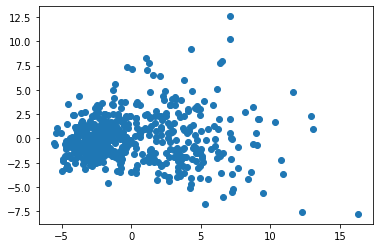

In [22]:
#Imprimimos los datos sin etiqueta.
#Recordar que PCA es un aprendizaje no supervisado
plt.scatter(X1,X2)
plt.show()

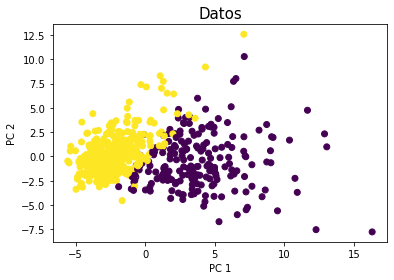

In [23]:
plt.scatter(X1,X2, c=Y)
#plt.scatter(nuevosDatosSK['PC1'],nuevosDatosSK['PC2'],c=Y)
plt.title('Datos', size=15)
plt.xlabel('PC 1'), plt.ylabel('PC 2')
plt.show()

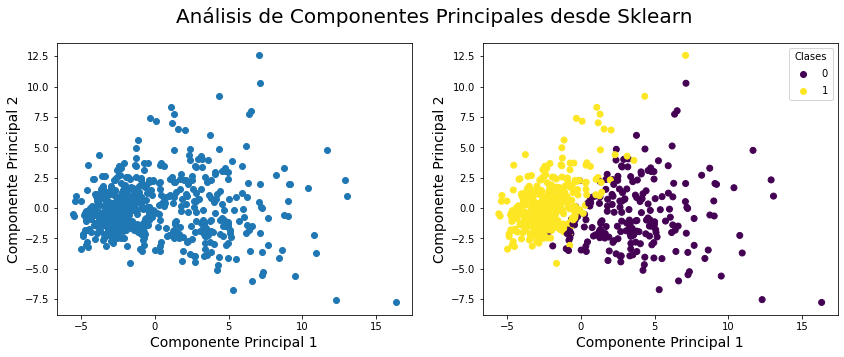

In [24]:
fig, ((grafica1),(grafica2)) =plt.subplots(1,2, figsize=(14,5)) #sharey = Tus graficas comparten los mismos ejes

grafica1.scatter(X1,X2)
grafica2.scatter(X1,X2,c=Y)


grafica1.set_xlabel('Componente Principal 1',size=14), grafica1.set_ylabel('Componente Principal 2',size=14) , 
grafica2.set_xlabel('Componente Principal 1',size=14), grafica2.set_ylabel('Componente Principal 2',size=14)

leyenda = grafica2.legend(*grafica.legend_elements(), loc='best',title = 'Clases' )
#plt.title('Analisis de Componentes Principales')
fig.suptitle('Análisis de Componentes Principales desde Sklearn', size = '20')
plt.show()


# Método de Regresión Logística
         1.- Separamos los datos en trainingset & testset
         2.- Definimos la función de hipótesis
         3.- Definimos la función de Costo y el gradiente de costos  
         4.- Definimos el gradiente de descensos 
         5.- Graficamos
 

## Scratch

In [25]:
def separacionDatos(X,Y,tamanioTest=0.2):
  m= Y.size
  testTamanio = int(m*tamanioTest)
  indicesTest= np.random.choice(m,testTamanio)
  #setdiff1d regresa un vector con elementos que estan el parametro uno y no en el parametro dos
  indicesEntrenamiento = np.setdiff1d(np.arange(m),indicesTest)
  return X[indicesTest], Y[indicesTest], X[indicesEntrenamiento], Y[indicesEntrenamiento]

In [26]:
def sigmoide(X):
  return 1/(1+ np.exp(-X))

In [27]:
def funcionHipotesis(X,theta):
  return sigmoide(X@theta)

In [28]:
def funcionDeCosto(X, Y, theta):
  h= funcionHipotesis(X, theta)
  izq= -Y* np.log(h)
  der = -(1-Y)* np.log(1-h)
  j=sum(izq+der)
  return j

In [29]:
def gradienteCosto(X,Y,theta):
  m= Y.size
  h = funcionHipotesis(X, theta)
  dj= ((h-Y)@X) /m
  return dj

In [30]:
def gradienteDescenso(X,Y, alfa, E=0.001):
  m= Y.size
  X = np.hstack([np.ones([m,1]),X])
  n = X.shape[1]

  theta = np.zeros([n])


  costoAnterior= funcionDeCosto(X,Y,theta)
  theta = theta- alfa*gradienteCosto(X,Y,theta)
  costoActual= funcionDeCosto(X,Y,theta)

  diferencia = abs(costoAnterior - costoActual)

  iteraciones=[0,1]
  yCostos=[costoAnterior, costoActual]
  i=2

  while diferencia> E:
    costoAnterior= funcionDeCosto(X,Y,theta)
    theta = theta- alfa*gradienteCosto(X,Y,theta)
    costoActual= funcionDeCosto(X,Y,theta)

    diferencia = abs(costoAnterior - costoActual)

    iteraciones.append(i)
    yCostos.append(costoActual)
    i=i+1

  plt.plot(iteraciones, yCostos)
  plt.title("Costos vs Iteraciones")
  plt.xlabel("Iteraciones")
  plt.ylabel("Costo")

  print("Último costo:",yCostos[-1])
  plt.show()
  return theta


Último costo: 53.60193849050086


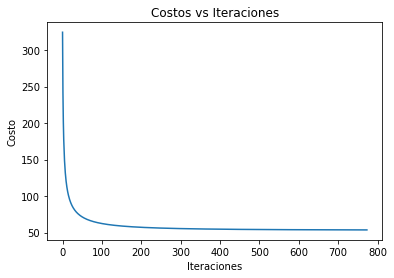

In [31]:
xTest, yTest, xEntrenamiento, yEntrenamiento = separacionDatos(X,Y)
alfa = 0.1
theta = gradienteDescenso(xEntrenamiento, yEntrenamiento, alfa)

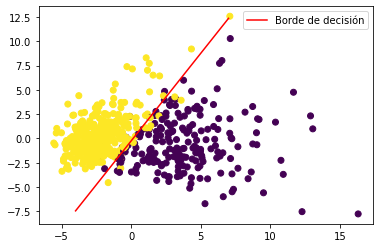

In [32]:
plt.scatter(X1,X2,c=Y)
#plt.scatter(nuevosDatos['PC1'],nuevosDatos['PC2'],c=Y)
x = np.linspace(-4, 7, 3)
y = - (theta[0] + x * theta[1]) / theta[2]
plt.plot(x, y, 'r', label="Borde de decisión")
plt.legend()
plt.show()

## Sklearn

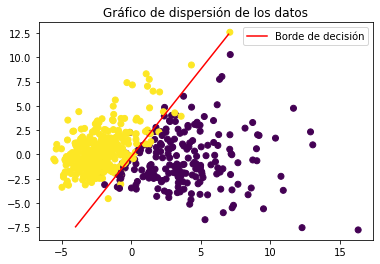

In [33]:
#Creamos un modelo de regresión logística llamado modeloRegresionLogistica
modeloRegresionLogistica = LogisticRegression(solver='lbfgs') 

#Entrenamos el modelo pasandole nuestros datos de entrenamiento
modeloRegresionLogistica.fit(xEntrenamiento, yEntrenamiento)

#Usamos el modelo para predecir las etiquetas de datos de test
yPredicha = modeloRegresionLogistica.predict(xTest) #Esto nos arroja el esperado un vector con predicción 0 y 1

#Ahora recuperaremos los parámetros del modelo
theta0 = modeloRegresionLogistica.intercept_[0]
theta1 = modeloRegresionLogistica.coef_[0][0]
theta2 = modeloRegresionLogistica.coef_[0][1]

plt.scatter(X1,X2,c=Y)
plt.title("Gráfico de dispersión de los datos")
x = np.linspace(-4, 7, 3)
y = - (theta0 + x * theta1) / theta2
plt.plot(x, y, 'r', label="Borde de decisión")
plt.legend()
plt.show()

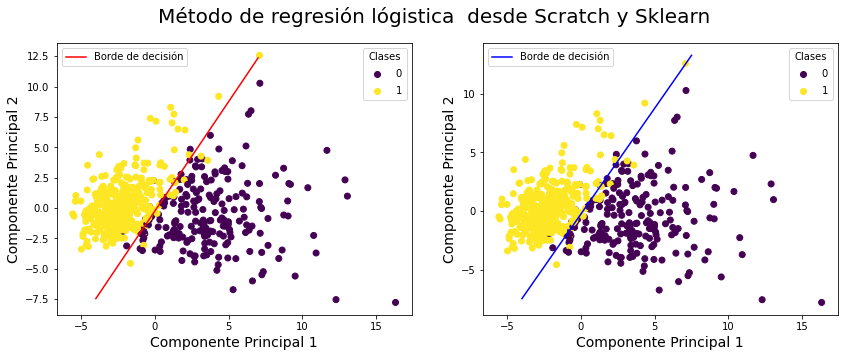

In [34]:
fig, ((grafica1),(grafica2)) =plt.subplots(1,2, figsize=(14,5)) #sharey = Tus graficas comparten los mismos ejes

grafica1.scatter(X1,X2,c=Y)
grafica2.scatter(X1,X2,c=Y)


grafica1.set_xlabel('Componente Principal 1',size=14), grafica1.set_ylabel('Componente Principal 2',size=14) , 
grafica2.set_xlabel('Componente Principal 1',size=14), grafica2.set_ylabel('Componente Principal 2',size=14)


leyenda1 = grafica1.legend(*grafica.legend_elements(), loc='best',title = 'Clases' )
grafica1.add_artist(leyenda1)
leyenda2 = grafica2.legend(*grafica.legend_elements(), loc='best',title = 'Clases' )
grafica2.add_artist(leyenda2)


x1 = np.linspace(-4, 7, 3)
y1 = - (theta[0] + x1 * theta[1]) / theta[2]
grafica1.plot(x1, y1, 'r', label="Borde de decisión")
leyenda3 = grafica1
grafica1.legend(loc='upper left')
x2 = np.linspace(-4, 7.5, 3)
y2 = - (theta0 + x2 * theta1) / theta2
grafica2.plot(x2, y2, 'b', label="Borde de decisión")
leyenda4 = grafica2
grafica2.legend(loc='upper left')


fig.suptitle('Método de regresión lógistica  desde Scratch y Sklearn', size = '20')
plt.show()

# Método KMeans
            1.- Definimos nuestra distancia euclidiana entre puntos y se dan parámetros de arranque
            2.- Especificamos el número de grupos que se quieren identificar
            3.- Se inicializa el algoritmo
            4.- Se asgina un centroide a cada grupo
            5.- Se hace la actualización

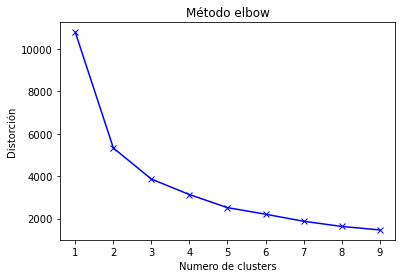

In [35]:
#Se realiza un método de codo para saber cuantos centroídes son ncesarios
distorcion=[]
K=range(1,10)

for k in K:
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(X)
    distorcion.append(kmeans.inertia_)
    
plt.plot(K,distorcion, 'bx-')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorción')
plt.title('Método elbow')
plt.show()

## Scratch

In [36]:
def distancia_euclidiana(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [37]:
class K_Means():

    def __init__(self, k=5, iteraciones_max=100, paso_grafica=False):
        self.k = k #Numero de clusters, por defecto 5
        self.iteraciones_max = iteraciones_max #Numero máximo de iteraciones
        self.paso_grafica = paso_grafica #Quiero ver cada paso? Es decir cada gráfica de cada iteracion

        self.clusters = [[] for i in range(self.k)] #Almacenamos los clusters
        self.centroides = [] #Almacenamos los centroides

    #No tenemos método fit porque al ser aprendizaje no supervisado no necesitamos etiquetas
    def predict(self, datos):
        self.datos = datos #Datos
        self.numero_datos, self.numero_columnas = datos.shape #Dimensiones [150,2]
        
        #Inicializamos los centroides aleatorios
        #Elegimos indices aleatorios de numero_datos
        indices_aleatorios = np.random.choice(self.numero_datos, self.k, replace=False) #Arreglo de tamaño k, replace=False porque no queremos datos repetidos
        self.centroides = [self.datos[indice] for indice in indices_aleatorios] #Lista con 3 parejas de numeros salidos de nuestros datos

        # Optimizamos los clusters
        # Un ciclo for que hace las iteraciones que le indiquemos 
        for i in range(self.iteraciones_max):
            # Assign samples to closest centroides (create clusters)
            self.clusters = self.crear_clusters(self.centroides)
            
            if self.paso_grafica:
                self.visulaizar()

            #Una vez creados los clusters hasy que sacar la media de las distancias y asignar un nuevo centroide 
            #Guardamos los datos anteriores en una variable
            centroides_anteriores = self.centroides
            #Asignamos los centroides calculados a nuestra variable
            self.centroides = self.obtener_centroides_calculados(self.clusters)
            
            # revisamos si nuestro algoritmo ya convergió
            #en caso afirmativo terminamos el algoritmo
            if self.convergencia(centroides_anteriores, self.centroides):
                break

            if self.paso_grafica:
                self.visulaizar()

        # Obtenemos la etiqueta del cluster al cual fue asignado
        return self.obtener_etiquetas_clusters(self.clusters)

    #Funcion que nos regresa la etiqueta del cluster al que fue asignado cada dato
    def obtener_etiquetas_clusters(self, clusters):
        #hacemos un arreglo vacio de tamaño del numero de datos que tenemos
        #Es decir el indice del cluster al que fue asignado
        etiquetas = np.empty(self.numero_datos)

        #recorremos el arreglo clusters el cual contiene los indices de los elementos en cada cluster
        #es una lista de listas
        for indice_cluster, cluster in enumerate(clusters):
            #recorremos cada indice 
            for indice_muestra in cluster:
                #Metemos las etiquetas de cada pareja de datos
                etiquetas[indice_muestra] = indice_cluster
        return etiquetas

    #En esta funcion asignamos los puntos al centroide más cercano
    def crear_clusters(self, centroides):
        #Lista que contendra lis indices de los elementos de cada cluster
        clusters = [[] for i in range(self.k)]
        #enumerate le ponde un indice visible a cada dato en datos
        # (0,[2,4]),(1,[3,8])
        for indice, muestra in enumerate(self.datos):
            #Asignamos a indice_centroide el centroide más cercano utilizando la funcion que calcula la distancia entre los puntos
            #A la fucion le pasamos los puntos y los centroides
            indice_centroide = self.centroide_cercano(muestra, centroides)
            #En nuestra lista clusters agregamos cada indice
            clusters[indice_centroide].append(indice)
        return clusters

    #En esta funcion calculamos la distancia de cad apunto a su centroide 
    def centroide_cercano(self, muestra, centroides):
        #Calculamos las distancias euclidianas a los puntos y las guardamos en una lsita de nombre distancias
        distancias = [distancia_euclidiana(muestra, punto) for punto in centroides]
        #Con argmin seleccionamos el indice del valor más bajo en distancias y lo guardamos en centroide_indice_cercano
        centroide_indice_cercano = np.argmin(distancias)
        #Regresamos el indice
        return centroide_indice_cercano

    #Funcion que calcula la media de las distancias y asigna los centroides calculados
    def obtener_centroides_calculados(self, clusters):
        #centroides es un arreglo lleno de ceros de tamaño 3 y dos columnas
        # [[x,y],[x,y],[x,y]]
        centroides = np.zeros((self.k, self.numero_columnas))
        #Enumeramos cada cluster y lo iteramos
        #recordemos que clusters es una lista de listas 
        for indice_cluster, cluster in enumerate(clusters):
            #cluster es una lista de los indices de los elementos pertenecientes al cluster 
            #con np.mean() calculamos la media 
            #usamos datos[cluster] para llamar a la pareja de datos de la cual se sacará la media
            promedio_cluster = np.mean(self.datos[cluster], axis=0)
            #una vez calculada la media de cada cluster se lo asignamos a los centroides
            centroides[indice_cluster] = promedio_cluster
        return centroides

    #funcion que revisa la convergencia de los centroides
    #Es decir cuando la distancia entre centroides_anteriores y centroides es 0
    def convergencia(self, centroides_anteriores, centroides):
        #asignamos a un arreglo de distancias 
        distancias = [distancia_euclidiana(centroides_anteriores[i], centroides[i]) for i in range(self.k)]
        #sumamos el arreglo y si es 0 entonces nuestro algoritmo convergió
        #regresa un true o false
        return sum(distancias) == 0

    def visulaizar(self):
        self.fig= plt.figure()
        self.ax = self.fig.add_subplot(1,1,1)

        for i, indice in enumerate(self.clusters):
            #print(self.datos[indice])
            #print('**********************')
            #print(self.datos[indice])
            # Utilizar el .T divide nuestra lista de listas inicial en dos listas separadas
            punto = self.datos[indice].T
            
            #Utilizar *punto le dice a nuestra funcion que le estamos pasando una lista con x y otra con y 
            #dentro de la misma variable
            self.ax.scatter(*punto)
            
        for punto in self.centroides:
            self.ax.scatter(*punto, marker="x", color='black', linewidth=2)
            
        plt.xlabel('Componente Principal 1', size = 14)
        plt.ylabel('Componente Principal 2', size = 14)
        plt.title('Método K-Means para 5 clusters desde Scratch', size = 18)
        plt.show()
    
        

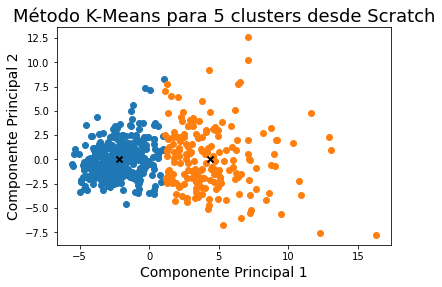

In [38]:
kMeans=K_Means(k=2, iteraciones_max=10, paso_grafica=False)
kMeans.predict(X)
kMeans.visulaizar()

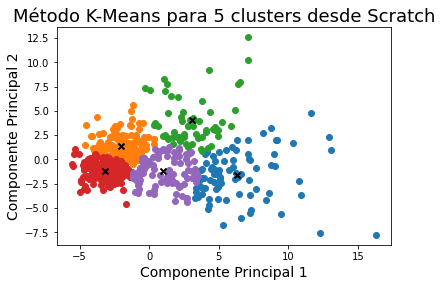

In [39]:
kMeans=K_Means(k=5, iteraciones_max=10, paso_grafica=False)
kMeans.predict(X)
kMeans.visulaizar()

## Sklearn

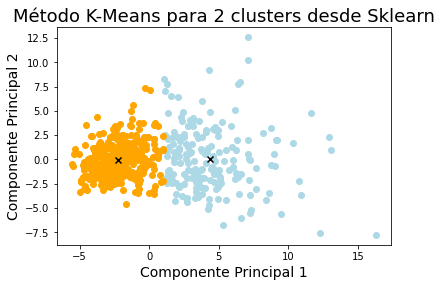

In [40]:
kmeans= KMeans(n_clusters=2)
modelo=kmeans.fit_predict(X)

centroides=kmeans.cluster_centers_.T

#datos_petalos[modelo==0,0] le decimos grafica los puntos x donde mi modelo valga 0 
#datos_petalos[modelo==0,1] le decimos grafica los puntos y donde mi modelo valga 0 
plt.scatter(X[modelo==0,0],X[modelo==0,1], c='lightblue')
plt.scatter(X[modelo==1,0],X[modelo==1,1], c='orange')
plt.scatter(X[modelo==2,0],X[modelo==2,1], c='red')
plt.scatter(X[modelo==3,0],X[modelo==3,1], c='green')
plt.scatter(X[modelo==4,0],X[modelo==4,1], c='yellow')

plt.scatter(*centroides, marker='x', color='black')


plt.title('Método K-Means para 2 clusters desde Sklearn', size = 18)
plt.xlabel('Componente Principal 1',  size = 14)
plt.ylabel('Componente Principal 2',  size = 14)
plt.show()

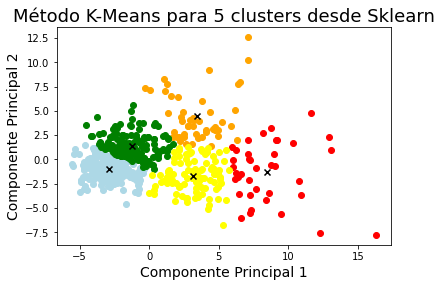

In [41]:
kmeans= KMeans(n_clusters=5)
modelo=kmeans.fit_predict(X)

centroides=kmeans.cluster_centers_.T

#datos_petalos[modelo==0,0] le decimos grafica los puntos x donde mi modelo valga 0 
#datos_petalos[modelo==0,1] le decimos grafica los puntos y donde mi modelo valga 0 
plt.scatter(X[modelo==0,0],X[modelo==0,1], c='lightblue')
plt.scatter(X[modelo==1,0],X[modelo==1,1], c='orange')
plt.scatter(X[modelo==2,0],X[modelo==2,1], c='red')
plt.scatter(X[modelo==3,0],X[modelo==3,1], c='green')
plt.scatter(X[modelo==4,0],X[modelo==4,1], c='yellow')

plt.scatter(*centroides, marker='x', color='black')


plt.title('Método K-Means para 5 clusters desde Sklearn', size = 18)
plt.xlabel('Componente Principal 1',  size = 14)
plt.ylabel('Componente Principal 2',  size = 14)
plt.show()

# Anexos

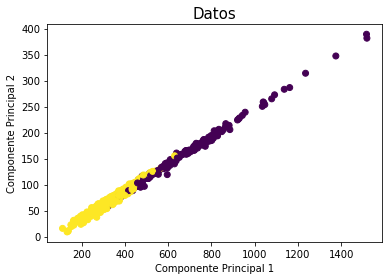

In [42]:
#Escalamos los datos

CancerDatos = cancer_features[['mean radius','mean texture','mean perimeter','mean area']]


escala = StandardScaler()
data = escala.fit_transform(CancerDatos)

matriz = np.asmatrix(data)
matrizCovarianza = np.cov(matriz.T)
#matrizCovarianza.shape

eigValores, eigVectores = np.linalg.eig(matrizCovarianza)
primerosDos = eigVectores[:,0:2]
nuevosDatos = CancerDatos.dot(primerosDos)
nuevosDatos= pd.DataFrame(np.hstack((nuevosDatos, np.array(cancer_targets).reshape(-1,1))), columns=['PC1','PC2','malign_benign'])

#Imprimimos los componentes principales 
Y = nuevosDatos.malign_benign.values 
plt.scatter(nuevosDatos['PC1'],nuevosDatos['PC2'],c=Y)
plt.xlabel('Componente Principal 1'), plt.ylabel('Componente Principal 2')
plt.title('Datos', size=15)
plt.show()

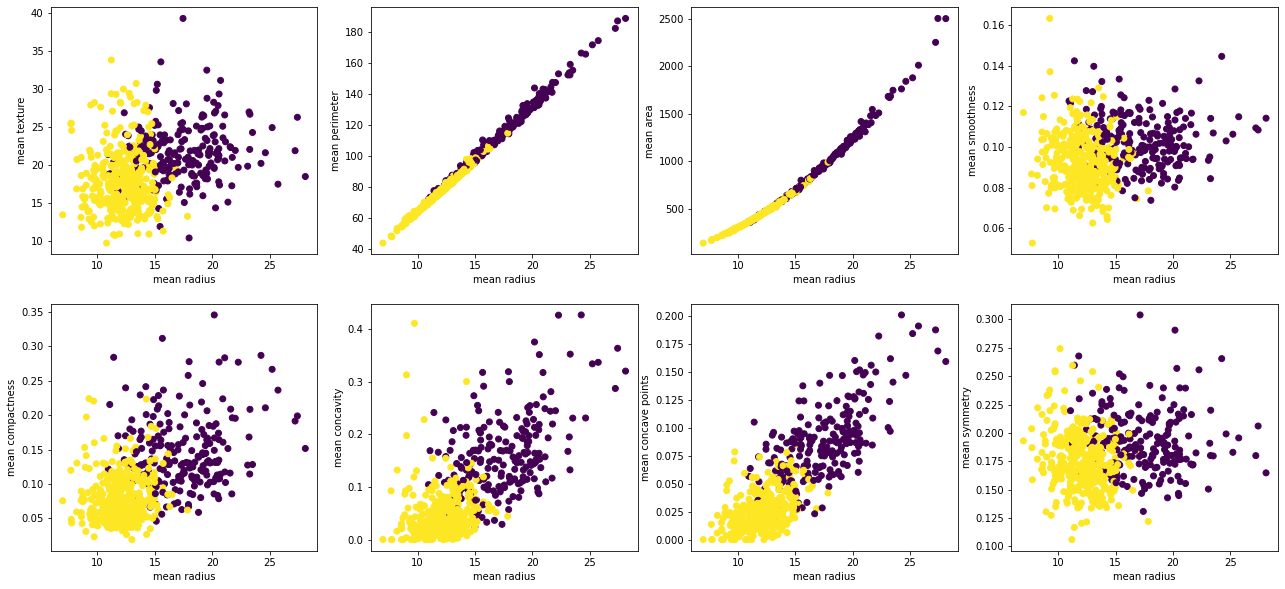

In [43]:
fig, ((grafica1,grafica2,grafica3, grafica4),(grafica5,grafica6,grafica7, grafica8)) =plt.subplots(2,4, figsize=(22,10)) #sharey = Tus graficas comparten los mismos ejes

grafica1.scatter(cancer_features['mean radius'],cancer_features['mean texture'],c=Y)
grafica2.scatter(cancer_features['mean radius'],cancer_features['mean perimeter'],c=Y)
grafica3.scatter(cancer_features['mean radius'],cancer_features['mean area'],c=Y)
grafica4.scatter(cancer_features['mean radius'],cancer_features['mean smoothness'],c=Y)
grafica5.scatter(cancer_features['mean radius'],cancer_features['mean compactness'],c=Y)
grafica6.scatter(cancer_features['mean radius'],cancer_features['mean concavity'],c=Y)
grafica7.scatter(cancer_features['mean radius'],cancer_features['mean concave points'],c=Y)
grafica8.scatter(cancer_features['mean radius'],cancer_features['mean symmetry'],c=Y)

grafica1.set_xlabel('mean radius'), grafica1.set_ylabel('mean texture') #, grafica1.set_title('Datos')
grafica2.set_xlabel('mean radius'), grafica2.set_ylabel('mean perimeter')
grafica3.set_xlabel('mean radius'), grafica3.set_ylabel('mean area')
grafica4.set_xlabel('mean radius'), grafica4.set_ylabel('mean smoothness')
grafica5.set_xlabel('mean radius'), grafica5.set_ylabel('mean compactness')
grafica6.set_xlabel('mean radius'), grafica6.set_ylabel('mean concavity')
grafica7.set_xlabel('mean radius'), grafica7.set_ylabel('mean concave points')
grafica8.set_xlabel('mean radius'), grafica8.set_ylabel('mean symmetry')


plt.show()



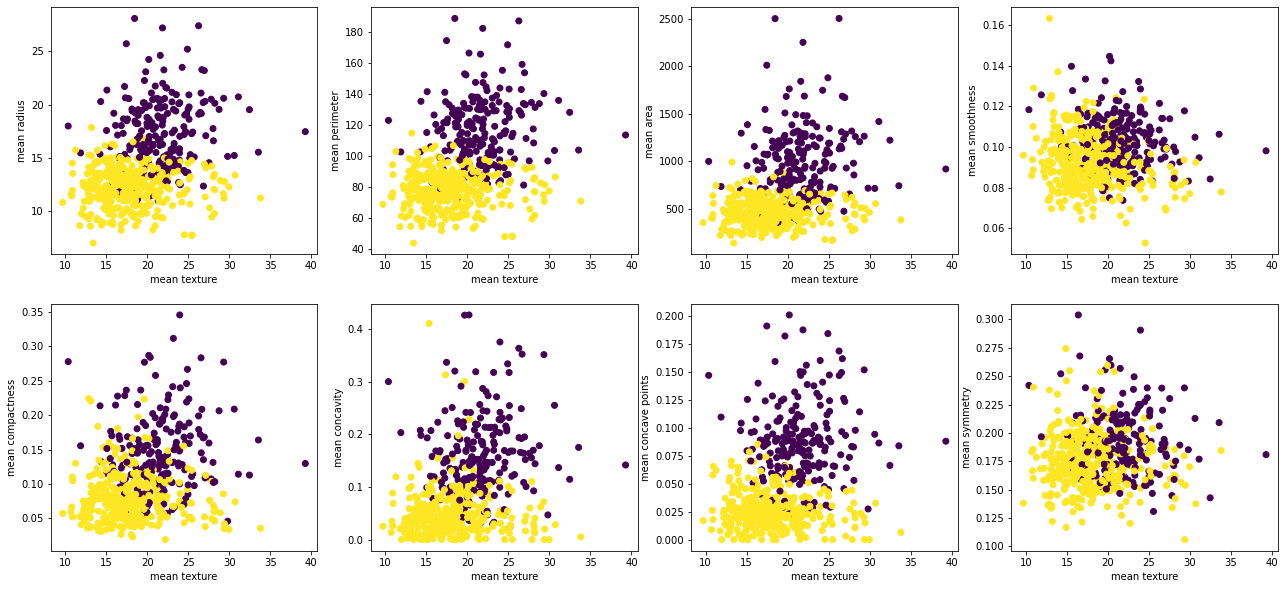

In [44]:
fig, ((grafica1,grafica2,grafica3, grafica4),(grafica5,grafica6,grafica7, grafica8)) =plt.subplots(2,4, figsize=(22,10)) #sharey = Tus graficas comparten los mismos ejes

grafica1.scatter(cancer_features['mean texture'],cancer_features['mean radius'],c=Y)
grafica2.scatter(cancer_features['mean texture'],cancer_features['mean perimeter'],c=Y)
grafica3.scatter(cancer_features['mean texture'],cancer_features['mean area'],c=Y)
grafica4.scatter(cancer_features['mean texture'],cancer_features['mean smoothness'],c=Y)
grafica5.scatter(cancer_features['mean texture'],cancer_features['mean compactness'],c=Y)
grafica6.scatter(cancer_features['mean texture'],cancer_features['mean concavity'],c=Y)
grafica7.scatter(cancer_features['mean texture'],cancer_features['mean concave points'],c=Y)
grafica8.scatter(cancer_features['mean texture'],cancer_features['mean symmetry'],c=Y)

grafica1.set_xlabel('mean texture'), grafica1.set_ylabel('mean radius') #, grafica1.set_title('Datos')
grafica2.set_xlabel('mean texture'), grafica2.set_ylabel('mean perimeter')
grafica3.set_xlabel('mean texture'), grafica3.set_ylabel('mean area')
grafica4.set_xlabel('mean texture'), grafica4.set_ylabel('mean smoothness')
grafica5.set_xlabel('mean texture'), grafica5.set_ylabel('mean compactness')
grafica6.set_xlabel('mean texture'), grafica6.set_ylabel('mean concavity')
grafica7.set_xlabel('mean texture'), grafica7.set_ylabel('mean concave points')
grafica8.set_xlabel('mean texture'), grafica8.set_ylabel('mean symmetry')


plt.show()